In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Data exploration

In [7]:
df["length"] = df["text"].apply(len)
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


Text(0.5, 1.0, 'frequency distribution of length of text')

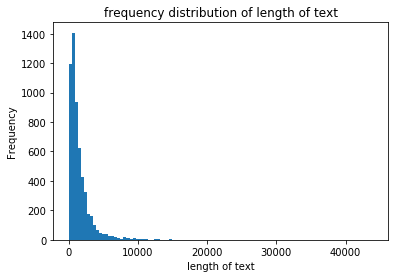

In [8]:
df["length"].plot(kind = "hist", bins = 100)
plt.xlabel("length of text")
plt.title("frequency distribution of length of text")

In [9]:
df["length"].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [10]:
# text with maximum length
df["text"][df["length"]==43952].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [11]:
# test with minimum length
df["text"][df["length"]==df["length"].min()].iloc[0]

'Subject: fyi '

In [12]:
# lets divide msgs into ham and spam
spam_df = df[df["spam"]==1]
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [13]:
ham_df = df[df["spam"]==0]
ham_df

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


Text(0.5, 1.0, 'Distribution of length of spam text')

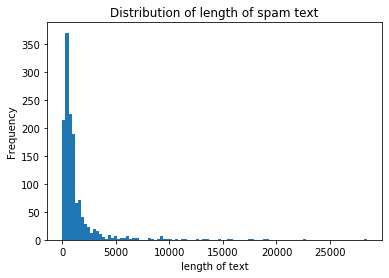

In [14]:
# distribution of length of spam texts
spam_df["length"].plot(kind = "hist",bins = 100)
plt.xlabel("length of text")
plt.title("Distribution of length of spam text")

Text(0.5, 1.0, 'Distribution of length of ham text')

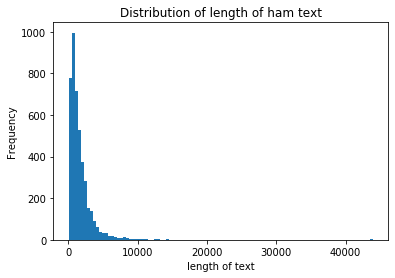

In [15]:
# distribution of length of ham texts
ham_df["length"].plot(kind = "hist",bins = 100)
plt.xlabel("length of text")
plt.title("Distribution of length of ham text")

In [16]:
print("spam percentage : {} %".format(len(spam_df)*100/len(df)))

spam percentage : 23.88268156424581 %


In [17]:
print("ham percentage : {} %".format(len(ham_df)*100/len(df)))

ham percentage : 76.11731843575419 %


In [18]:
# count of spam and ham texts in total 
df["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

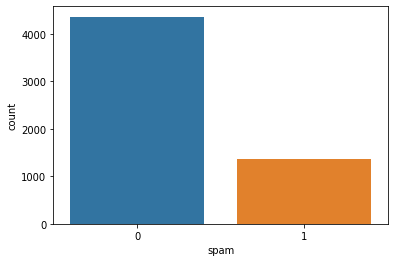

In [19]:
sns.countplot(df["spam"])

# Removing punctuations

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
text = "Hello, I am happy to work with AI!!"
text_modified = [char for char in text if char not in string.punctuation]

In [22]:
text_modified

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'w',
 'o',
 'r',
 'k',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'A',
 'I']

In [30]:
text_modified = "".join(text_modified)
text_modified

'Hello I am happy to work with AI'

In [32]:
text_modified.split()

['Hello', 'I', 'am', 'happy', 'to', 'work', 'with', 'AI']

# removing stopwords

In [24]:
import nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
text_modified_clean = [word for word in text_modified.split() if word.lower() not in stopwords.words("english")]

In [35]:
text_modified_clean

['Hello', 'happy', 'work', 'AI']

# count vectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [37]:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

In [38]:
x = vectorizer.fit_transform(sample_data)
x

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [39]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [40]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

# Lets apply all these processes to our email classification problem

In [56]:
# define function to remove punctuations and stopwords
def cleaning(msg):
    Text_punc_removed = [char for char in msg if char not in string.punctuation]
    Text_punc_removed_join = ''.join(Text_punc_removed)
    Text_clean = [word for word in Text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Text_clean

In [64]:
df_clean = df["text"].apply(cleaning)

In [65]:
df["text"][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [66]:
df_clean[0]

['Subject',
 'naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'really',
 'hard',
 'recollect',
 'company',
 'market',
 'full',
 'suqgestions',
 'information',
 'isoverwhelminq',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'make',
 'task',
 'much',
 'easier',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'become',
 'world',
 'ieader',
 'isguite',
 'ciear',
 'without',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 'promise',
 'marketing',
 'efforts',
 'become',
 'much',
 'effective',
 'list',
 'clear',
 'benefits',
 'creativeness',
 'hand',
 'made',
 'original',
 'logos',
 'specially',
 'done',
 'reflect',
 'distinctive',
 'company',
 'image',
 'convenience',
 'logo',
 'stationery',
 'provided',
 'formats',
 'easy',
 'use',
 'content',
 'management',
 'system',
 'letsyou',
 'change',
 'website',
 'content',
 'even',
 'structu

In [55]:
# lets apply count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = cleaning)

In [68]:
df_vectorizer = vectorizer.fit_transform(df["text"])

In [69]:
vectorizer.get_feature_names()

['\x01',
 '\x02',
 '\x03',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\x0f',
 '\x10',
 '\x12',
 '\x14',
 '\x15',
 '\x19',
 '0',
 '00',
 '000',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000003619',
 '000000000003991',
 '000000000003997',
 '000000000005168',
 '000000000005409',
 '000000000005411',
 '000000000005412',
 '000000000005413',
 '000000000005820',
 '000000000006238',
 '000000000006452',
 '000000000007494',
 '000000000007498',
 '000000000007876',
 '000000000010552',
 '000000000011185',
 '000000000012677',
 '000000000012734',
 '000000000012735',
 '000000000012736',
 '000000000012738',
 '000000000012741',
 '000000000012987',
 '000000000013085',
 '000000000013287',
 '000000000015384',
 '000000000015793',
 '000000000023619',
 '000000000024099',
 '000000000025307',
 '000000000025312',
 '000010220',
 '0000102317',
 '0000102374',
 '0000102789',
 '0000104281',
 '0000104282',
 '0000104486',
 '0000104631',
 '0000104730',
 '0000104776',
 '0000104778',
 '0000107043',
 '0000108729',


In [71]:
df_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
df_vectorizer.shape

(5728, 37229)

# training model by naive bayes classifier

In [73]:
x = df_vectorizer
y = df["spam"]

In [74]:
x.shape

(5728, 37229)

In [75]:
y.shape

(5728,)

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [77]:
x_train.shape

(4582, 37229)

In [79]:
x_test.shape

(1146, 37229)

In [80]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [81]:
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
y_train_predict = classifier.predict(x_train)
y_test_predict = classifier.predict(x_test)

# evaluating the model

In [91]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_train,y_train_predict)
cm

array([[3455,   10],
       [   2, 1115]], dtype=int64)

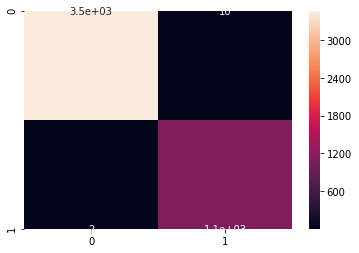

In [92]:
sns.heatmap(cm,annot = True)


In [93]:
cm_2= confusion_matrix(y_test,y_test_predict)
cm_2

array([[888,   7],
       [  0, 251]], dtype=int64)

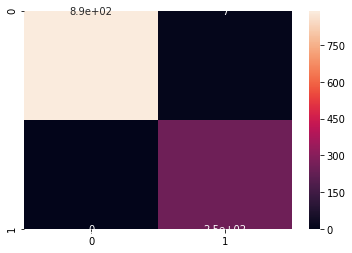

In [100]:
sns.heatmap(cm_2, annot=True)